In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [0]:
import io
train=pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [0]:
import io
test=pd.read_csv(io.BytesIO(uploaded['Test.csv']))

In [0]:
submission = pd.DataFrame()
submission['date_time'] = test.date_time.values

In [107]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [7]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [8]:
print('Train Set Columns: ',train.columns)
print('\nTrain Shape: ',train.shape)
print('\nTrain Unique Features: ',train.nunique())

Train Set Columns:  Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

Train Shape:  (33750, 15)

Train Unique Features:  date_time              28589
is_holiday                12
air_pollution_index      290
humidity                  88
wind_speed                17
wind_direction           361
visibility_in_miles        9
dew_point                  9
temperature             5611
rain_p_h                 353
snow_p_h                  12
clouds_all                60
weather_type              11
weather_description       38
traffic_volume          6462
dtype: int64


In [9]:
train.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [10]:
print('Test Set Columns: ',test.columns)
print('\nTest Shape: ',test.shape)
print('\nTest Unique Features: ',test.nunique())

Test Set Columns:  Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description'],
      dtype='object')

Test Shape:  (14454, 14)

Test Unique Features:  date_time              11986
is_holiday                12
air_pollution_index      290
humidity                  91
wind_speed                17
wind_direction           356
visibility_in_miles        9
dew_point                  9
temperature             3334
rain_p_h                  87
snow_p_h                   1
clouds_all                19
weather_type              10
weather_description       32
dtype: int64


In [11]:
train.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [12]:
test.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
dtype: int64

In [13]:
train['is_holiday'].value_counts()

None                         33707
Christmas Day                    5
New Years Day                    5
Thanksgiving Day                 5
Columbus Day                     4
Labor Day                        4
Veterans Day                     4
Washingtons Birthday             4
Memorial Day                     3
Martin Luther King Jr Day        3
State Fair                       3
Independence Day                 3
Name: is_holiday, dtype: int64

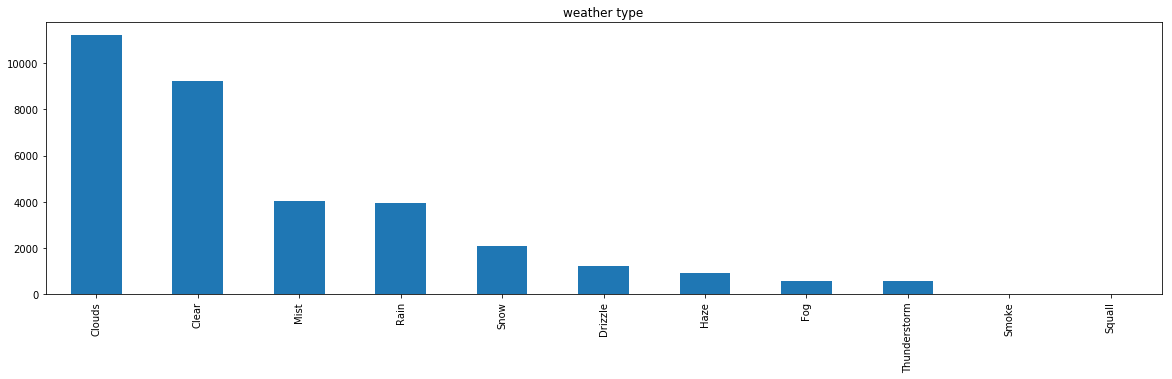

In [14]:
train['weather_type'].value_counts().plot.bar(figsize=(20,5),title='weather type')

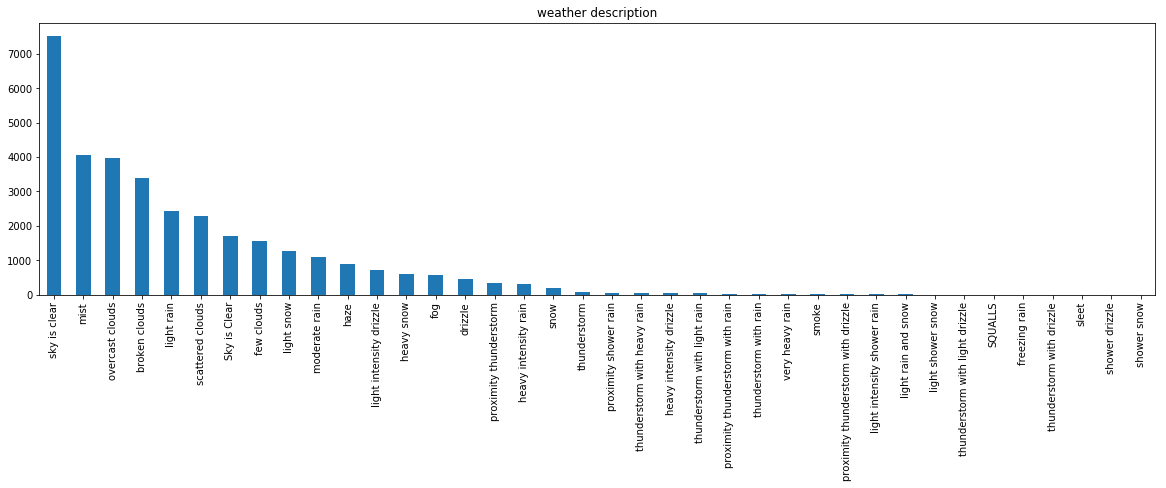

In [15]:
train['weather_description'].value_counts().plot.bar(figsize=(20,5),title = 'weather description')

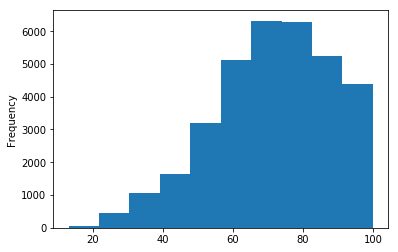

In [16]:
train['humidity'].plot.hist()

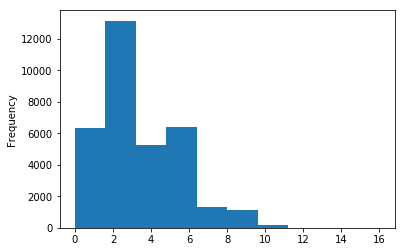

In [17]:
train['wind_speed'].plot.hist()

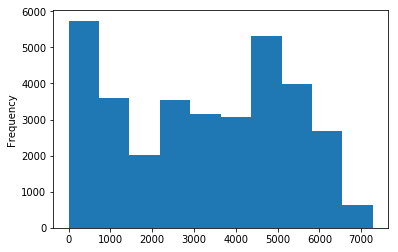

In [18]:
train['traffic_volume'].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

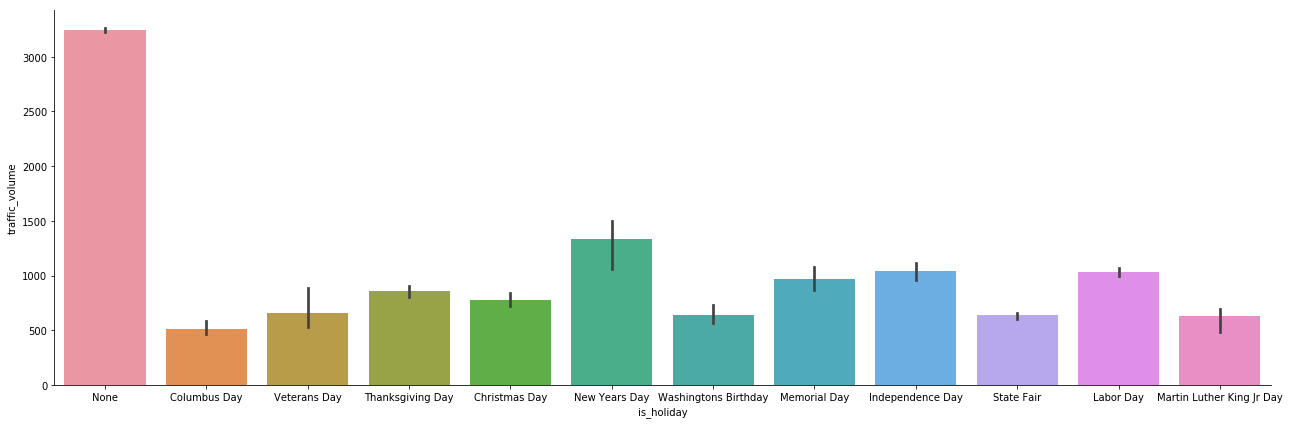

In [19]:
plt.figure(figsize=(20,8))
sns.factorplot('is_holiday', 'traffic_volume', data=train,kind='bar',aspect=3, size = 6)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

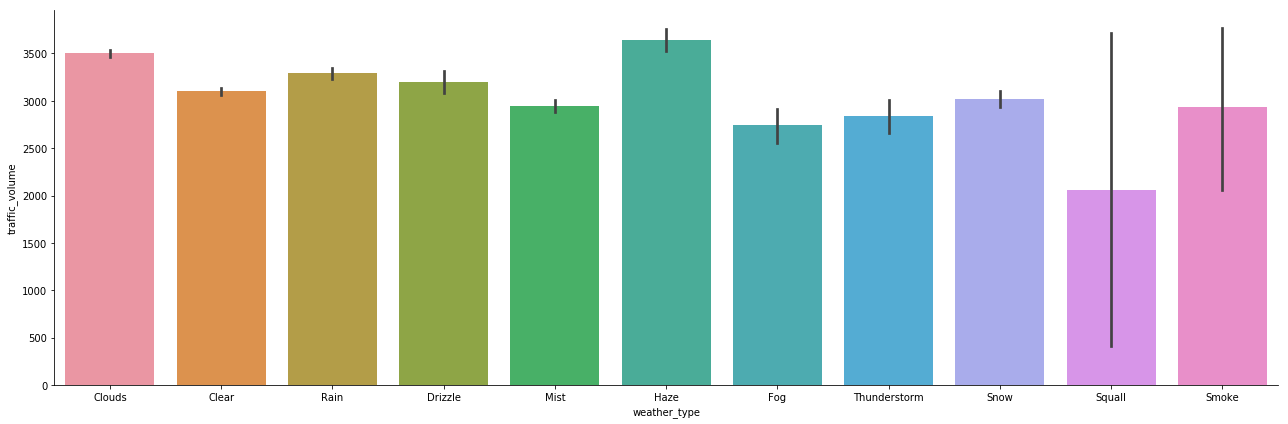

In [20]:
plt.figure(figsize=(16,6))
sns.factorplot('weather_type', 'traffic_volume', data=train,kind='bar',aspect=3, size = 6)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


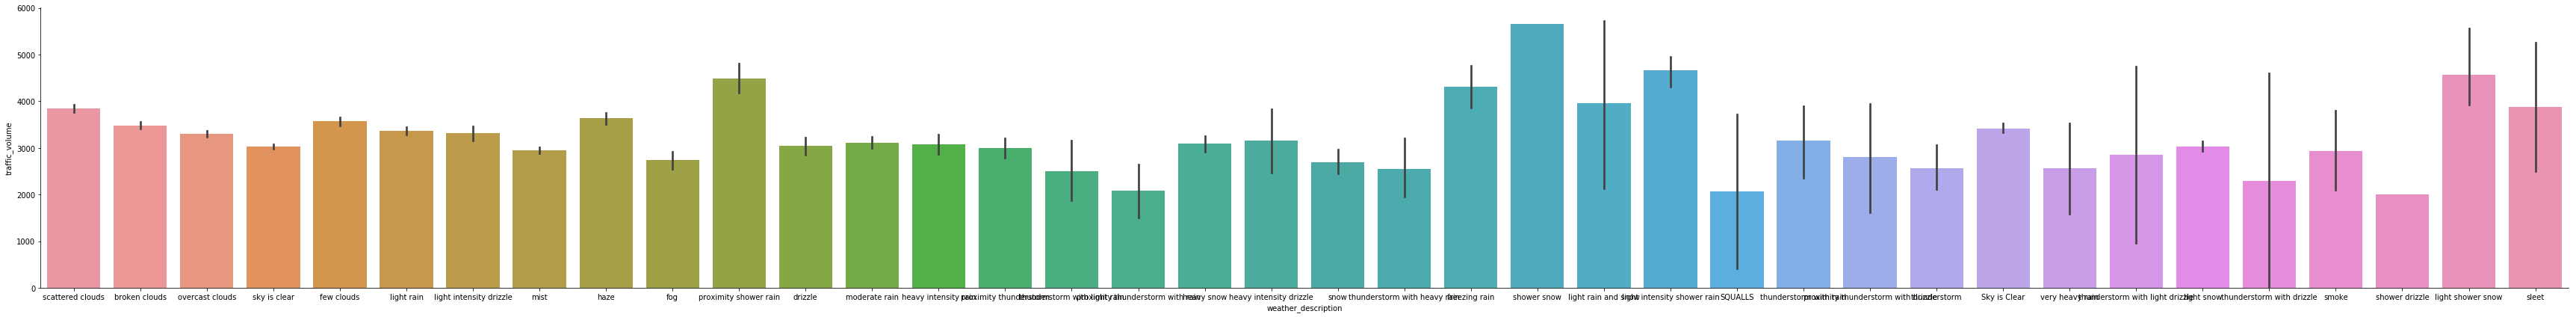

In [21]:
sns.factorplot('weather_description', 'traffic_volume', data=train,kind='bar',aspect=8, size = 6)

In [6]:
df = pd.DataFrame()
df['date_time'] = pd.to_datetime(train.date_time)
print(df.head())
print(df.shape)

            date_time
0 2012-10-02 09:00:00
1 2012-10-02 10:00:00
2 2012-10-02 11:00:00
3 2012-10-02 12:00:00
4 2012-10-02 13:00:00
(33750, 1)


In [7]:
df_test = pd.DataFrame()
df_test['date_time'] = pd.to_datetime(test.date_time)
print(df_test.head())
print(df_test.shape)

            date_time
0 2017-05-18 00:00:00
1 2017-05-18 00:00:00
2 2017-05-18 00:00:00
3 2017-05-18 01:00:00
4 2017-05-18 01:00:00
(14454, 1)


In [8]:
year = df.date_time.dt.year
print(year.shape)

(33750,)


In [9]:
year_test = df_test.date_time.dt.year
print(year_test.shape)

(14454,)


In [10]:
hour = df.date_time.dt.hour
print(hour.shape)
print(hour.head())

(33750,)
0     9
1    10
2    11
3    12
4    13
Name: date_time, dtype: int64


In [11]:
hour_test = df_test.date_time.dt.hour
print(hour_test.shape)
print(hour_test.head())

(14454,)
0    0
1    0
2    0
3    1
4    1
Name: date_time, dtype: int64


In [0]:
train['year'] = year
train['hour'] = hour
train.head()
train = train.drop(['date_time'],axis = 1)

In [0]:
test['year'] = year_test
test['hour'] = hour_test
test.head()
test = test.drop(['date_time'],axis = 1)

In [14]:
print("Unique no of years : ",train['year'].value_counts())
print("Unique no of hours : ",train['hour'].value_counts())

Unique no of years :  2016    9306
2013    8573
2014    4839
2015    4373
2017    4100
2012    2559
Name: year, dtype: int64
Unique no of hours :  4     1471
10    1465
6     1463
8     1460
7     1451
23    1448
0     1437
1     1431
5     1431
2     1428
3     1410
22    1402
21    1394
18    1390
20    1390
16    1388
9     1387
14    1387
12    1377
19    1370
11    1356
17    1346
15    1345
13    1323
Name: hour, dtype: int64


In [15]:
print("Unique no of years : ",test['year'].value_counts())
print("Unique no of hours : ",test['hour'].value_counts())

Unique no of years :  2018    7949
2017    6505
Name: year, dtype: int64
Unique no of hours :  5     632
9     631
7     628
6     624
8     620
4     620
1     618
3     615
10    613
0     600
16    600
11    596
18    596
23    592
22    592
2     591
19    591
15    589
20    589
21    588
17    587
13    582
14    582
12    578
Name: hour, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


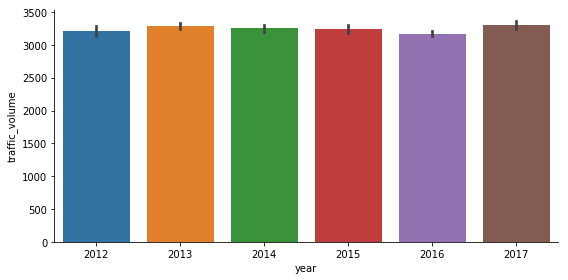

In [32]:
sns.factorplot('year', 'traffic_volume', data=train,kind='bar',aspect=2, size = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


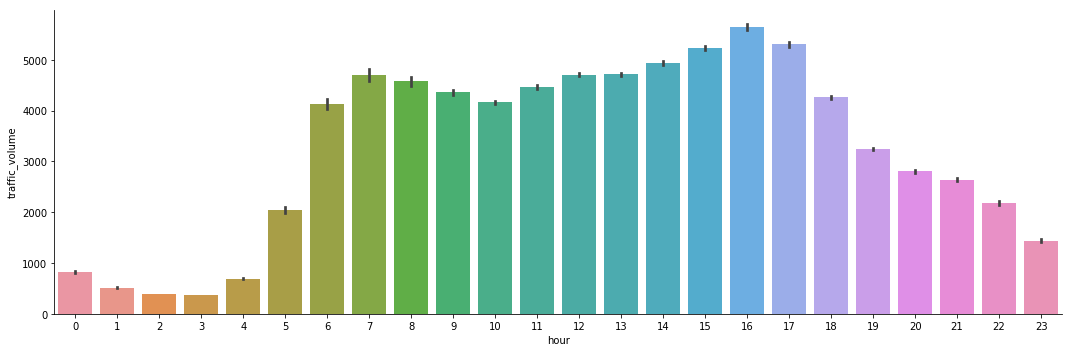

In [33]:
sns.factorplot('hour', 'traffic_volume', data=train,kind='bar',aspect=3, size = 5)

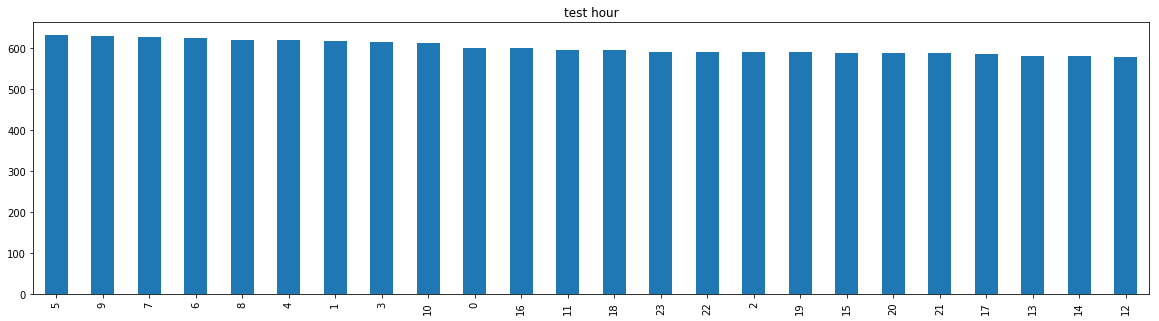

In [34]:
test['hour'].value_counts().plot.bar(figsize=(20,5),title = 'test hour')

In [35]:
train.dtypes

is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
year                     int64
hour                     int64
dtype: object

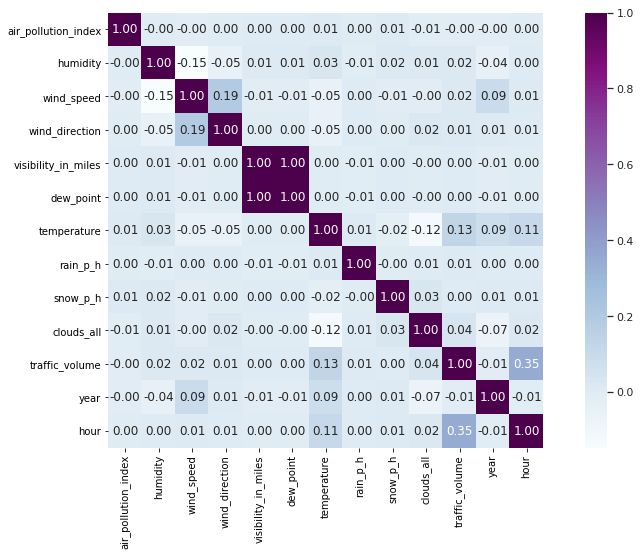

In [36]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.set(font_scale=1.0)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

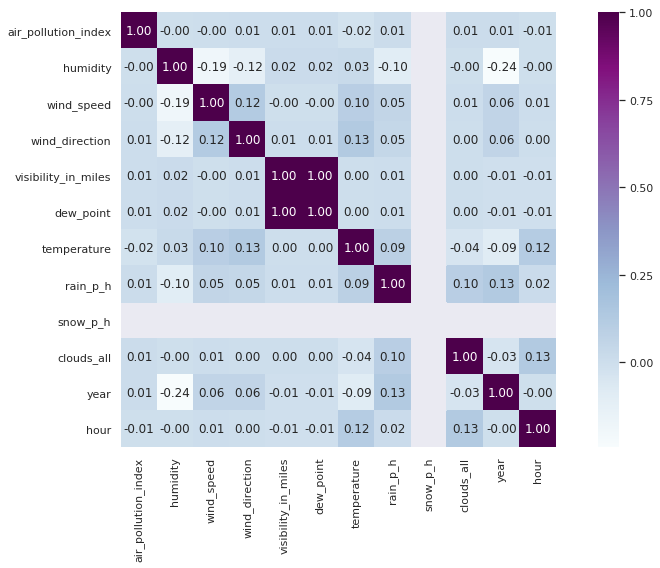

In [118]:
matrix=test.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.set(font_scale=1.0)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

In [38]:
test['snow_p_h'].value_counts()

0    14454
Name: snow_p_h, dtype: int64

In [0]:
train.drop(['snow_p_h'],axis =1 , inplace = True)
test.drop(['snow_p_h'],axis =1 , inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

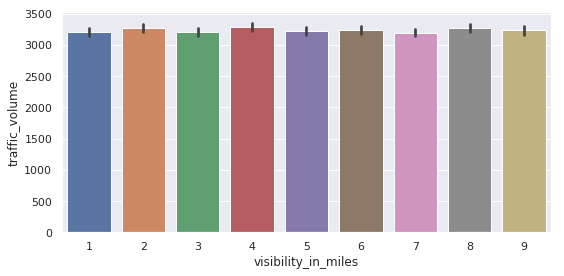

In [39]:
plt.figure(figsize=(16,6))
sns.factorplot('visibility_in_miles', 'traffic_volume', data=train,kind='bar',aspect=2, size = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

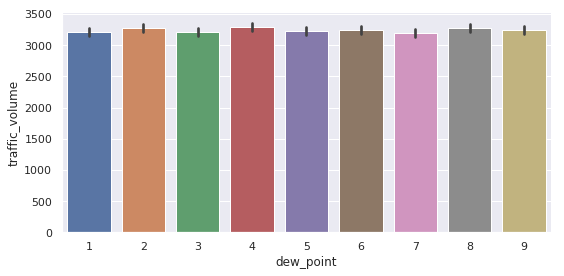

In [40]:
plt.figure(figsize=(16,6))
sns.factorplot('dew_point', 'traffic_volume', data=train,kind='bar',aspect=2, size = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x432 with 0 Axes>

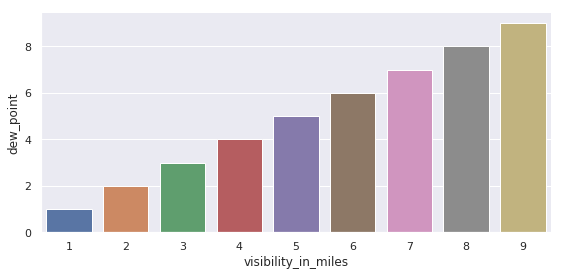

In [41]:
plt.figure(figsize=(16,6))
sns.factorplot('visibility_in_miles', 'dew_point', data=train,kind='bar',aspect=2, size = 4)

In [16]:
train = train.drop(['visibility_in_miles'],axis = 1)
print(train.columns)
print(train.shape)

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'dew_point', 'temperature', 'rain_p_h', 'snow_p_h',
       'clouds_all', 'weather_type', 'weather_description', 'traffic_volume',
       'year', 'hour'],
      dtype='object')
(33750, 15)


In [17]:
test = test.drop(['visibility_in_miles'],axis = 1)
print(test.columns)
print(test.shape)

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'dew_point', 'temperature', 'rain_p_h', 'snow_p_h',
       'clouds_all', 'weather_type', 'weather_description', 'year', 'hour'],
      dtype='object')
(14454, 14)


Treating categorical Values

In [45]:
sum(train.traffic_volume.values == 0)

2

In [46]:
df = train[(train[['traffic_volume']] != 0).all(axis=1)]

print(df.shape)

(33748, 14)


In [47]:
sum(df.traffic_volume.values <= 0)

0

In [48]:
y = df[['traffic_volume']]
train_data = df.drop(['traffic_volume'],axis =1)
print(train_data.shape)
print(y.head())
print(y.shape)

(33748, 13)
   traffic_volume
0            5545
1            4516
2            4767
3            5026
4            4918
(33748, 1)


In [49]:
y['traffic_volume'] = np.log(y['traffic_volume'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
print('Train Shape',train_data.shape)
print('Test Shape',test.shape)

Train Shape (33748, 13)
Test Shape (14454, 13)


In [51]:
train_X_categorical = train_data.select_dtypes(include = 'object')
test_X_categorical = test.select_dtypes(include = 'object')
print("Train Columns: ", train_X_categorical.columns)
print("Test Columns: ", test_X_categorical.columns)

Train Columns:  Index(['is_holiday', 'weather_type', 'weather_description'], dtype='object')
Test Columns:  Index(['is_holiday', 'weather_type', 'weather_description'], dtype='object')


In [0]:
train_obj_cols = train_X_categorical.columns
test_obj_cols = test_X_categorical.columns
train_df = train_data.drop(train_obj_cols,axis = 1)
test_df = test.drop(train_obj_cols,axis = 1)

In [53]:
train_df.head()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,year,hour
0,121,89,2,329,1,288.28,0.0,40,2012,9
1,178,67,3,330,1,289.36,0.0,75,2012,10
2,113,66,3,329,2,289.58,0.0,90,2012,11
3,20,66,3,329,5,290.13,0.0,90,2012,12
4,281,65,3,329,7,291.14,0.0,75,2012,13


In [54]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (33748, 10)
Test Shape (14454, 10)


In [0]:
# also the unique number of categorical values aren't same, which results in different test and train shape
train_len = train_df.shape[0]

# Combining the two categorical datsets one after the other
combined = pd.concat([train_X_categorical,test_X_categorical],ignore_index=True, sort = False)
categorical_cols = combined.columns


# Creating Label Encoded values for the categorical values avoid the dummy variable trap
dummies = pd.get_dummies(combined, columns=categorical_cols,  drop_first = True)

# Seperating the datasets from combined dataset
train_dummies = dummies[:train_len]
test_dummies = dummies[train_len:]


In [89]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (33748, 10)
Test Shape (14454, 10)


In [87]:
print('Train Shape',train_dummies.shape)
print('Test Shape',test_dummies.shape)

Train Shape (33748, 58)
Test Shape (14454, 58)


In [88]:
test_df.tail()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,year,hour
14449,176,21,4,345,4,283.45,0.0,75,2018,19
14450,214,95,8,280,6,282.76,0.0,90,2018,20
14451,173,63,4,238,1,282.73,0.0,90,2018,21
14452,21,57,8,268,7,282.09,0.0,90,2018,22
14453,116,70,8,328,6,282.12,0.0,90,2018,23


In [91]:
# Concatenating with the main DataFrame
train_df.reset_index(drop=True, inplace=True)
df_train = pd.concat([train_df,train_dummies],axis = 1)
print(df_train.shape)

(33748, 68)


In [0]:
test_df.reset_index(drop=True, inplace=True)
test_dummies.reset_index(drop=True, inplace=True)
df_test = pd.concat([test_df,test_dummies],axis = 1)

In [93]:
print('Train Shape',df_train.shape)
print('Test Shape',df_test.shape)

Train Shape (33748, 68)
Test Shape (14454, 68)


In [94]:
df_test.head()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,year,hour,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_None,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,73,63,1,27,4,285.15,0.0,90,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,251,63,1,27,4,285.15,0.0,90,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,75,56,1,0,1,285.15,0.0,90,2017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,98,56,1,351,2,284.79,0.0,90,2017,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,283,56,1,351,1,284.79,0.0,90,2017,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
df_train.head()

,air_pollution_index,humidity,wind_speed,wind_direction,dew_point,temperature,rain_p_h,clouds_all,year,hour,is_holiday_Columbus Day,is_holiday_Independence Day,is_holiday_Labor Day,is_holiday_Martin Luther King Jr Day,is_holiday_Memorial Day,is_holiday_New Years Day,is_holiday_None,is_holiday_State Fair,is_holiday_Thanksgiving Day,is_holiday_Veterans Day,is_holiday_Washingtons Birthday,weather_type_Clouds,weather_type_Drizzle,weather_type_Fog,weather_type_Haze,weather_type_Mist,weather_type_Rain,weather_type_Smoke,weather_type_Snow,weather_type_Squall,weather_type_Thunderstorm,weather_description_Sky is Clear,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,weather_description_freezing rain,weather_description_haze,weather_description_heavy intensity drizzle,weather_description_heavy intensity rain,weather_description_heavy snow,weather_description_light intensity drizzle,weather_description_light intensity shower rain,weather_description_light rain,weather_description_light rain and snow,weather_description_light shower snow,weather_description_light snow,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity shower rain,weather_description_proximity thunderstorm,weather_description_proximity thunderstorm with drizzle,weather_description_proximity thunderstorm with rain,weather_description_scattered clouds,weather_description_shower drizzle,weather_description_shower snow,weather_description_sky is clear,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,121,89,2,329,1,288.28,0.0,40,2012,9,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,178,67,3,330,1,289.36,0.0,75,2012,10,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,113,66,3,329,2,289.58,0.0,90,2012,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,66,3,329,5,290.13,0.0,90,2012,12,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,281,65,3,329,7,291.14,0.0,75,2012,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler().fit(df_train)
train_X = scaler_x.transform(df_train)
test_X = scaler_x.transform(df_test)

In [97]:
y.head()

,traffic_volume
0,8.620652
1,8.415382
2,8.469472
3,8.522380
4,8.500657


In [98]:
train_X

array([[-0.40411918,  1.05578583, -0.67048017, ..., -0.03222073,
        -0.02611487, -0.02310086],
       [ 0.27660086, -0.24970347, -0.18403755, ..., -0.03222073,
        -0.02611487, -0.02310086],
       [-0.49965883, -0.3090439 , -0.18403755, ..., -0.03222073,
        -0.02611487, -0.02310086],
       ...,
       [-0.20109741, -0.0716822 , -1.15692278, ..., -0.03222073,
        -0.02611487, -0.02310086],
       [ 0.88566616, -0.3090439 , -1.15692278, ..., -0.03222073,
        -0.02611487, -0.02310086],
       [-0.1772125 , -0.48706516, -1.15692278, ..., -0.03222073,
        -0.02611487, -0.02310086]])

In [99]:
y.shape

(33748, 1)

In [100]:
print('Train Shape',train_X.shape)
print('Test Shape',test_X.shape)

Train Shape (33748, 68)
Test Shape (14454, 68)


In [101]:
y.isnull().sum()

traffic_volume    0
dtype: int64

Baseline Model

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(train_X,y,test_size =0.2,random_state = 42)

In [104]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []

for name,model in pipelines:
    kFold = KFold(n_splits = 10 , random_state =21)
    cv_results = cross_val_score(model , X_train,Y_train, cv = kFold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    result = "%s : MeanError: %f  Std: (%f)" %(name,cv_results.mean(),cv_results.std())
    print(result)

ScaledLR : MeanError: -9059981648276527165472768.000000  Std: (15670659147115944350842880.000000)
ScaledLASSO : MeanError: -0.980695  Std: (0.035147)
ScaledEN : MeanError: -0.980695  Std: (0.035147)
ScaledKNN : MeanError: -0.521972  Std: (0.030233)
ScaledCART : MeanError: -0.369852  Std: (0.051266)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

ScaledGBM : MeanError: -0.185443  Std: (0.018061)


In [0]:
# from sklearn.model_selection import GridSearchCV


# param_grid={'n_estimators':[500,1000],
#             'learning_rate': [0.1,0.05, 0.01], 
#             'max_depth':[4], 
#             'max_features':[1.0,0.3,0.1] }

# model = GradientBoostingRegressor(random_state=21,verbose = 1) # n_jobs is no. of cores
# kfold = KFold(n_splits=10, random_state=21)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, n_jobs =4)
# grid_result = grid.fit(X_train, Y_train.ravel())

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [105]:
from sklearn.model_selection import GridSearchCV


param_grid={'n_estimators':[1500],
            'learning_rate': [0.1], 
            'max_depth':[8], 
            'max_features':[1.0] }

model = GradientBoostingRegressor(random_state=21,verbose = 1) # n_jobs is no. of cores
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, n_jobs =4)
grid_result = grid.fit(X_train, Y_train.ravel())

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean : %f  Stddev: (%f) with parameters: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Train R-squared: %.8f" % (grid_result.score(X_train,Y_train.ravel())))

AttributeError: ignored

In [106]:
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(n_estimators=1500, max_depth=8, max_features=1.0, learning_rate=0.1, random_state=21, verbose = 1)
model.fit(X_train,Y_train)

print("Predicting on the Test Set")
preds =  model.predict(X_val)
print("MSE: ", mean_squared_error(Y_val,preds) )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           0.8251            8.75m
         2           0.6990            8.78m
         3           0.5968            8.72m
         4           0.5135            8.73m
         5           0.4459            8.81m
         6           0.3908            8.82m
         7           0.3459            8.91m
         8           0.3095            8.92m
         9           0.2796            8.92m
        10           0.2550            8.91m
        20           0.1551            8.80m
        30           0.1324            8.63m
        40           0.1191            8.41m
        50           0.1089            8.09m
        60           0.0997            7.84m
        70           0.0949            7.46m
        80           0.0898            7.24m
        90           0.0864            6.95m
       100           0.0843            6.65m
       200           0.0523            5.88m
       300           0.0360            5.27m
       40

In [113]:
compare = pd.DataFrame({'Prediction': preds, 'Validation Data' : Y_val.traffic_volume.values})
compare.head(10)

,Prediction,Validation Data
0,7.574145,7.898411
1,6.439053,5.991465
2,7.963486,7.295735
3,8.296849,8.268988
4,8.472776,8.370316
5,8.252135,8.262559
6,8.403652,8.352554
7,8.590905,8.575839
8,8.460754,8.228978
9,7.940928,8.163656


In [117]:
actual_y_val = np.exp(Y_val.traffic_volume.values)
actual_predicted = np.exp(preds)
diff = abs(actual_y_val - actual_predicted)

compare_actual = pd.DataFrame({'Validation Data': actual_y_val, 'Predicted Volume' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(10)

,Validation Data,Predicted Volume,Difference
0,2692,1947,745
1,399,625,225
2,1473,2874,1400
3,3900,4011,110
4,4317,4782,465
5,3876,3835,40
6,4241,4463,222
7,5302,5382,80
8,3748,4725,977
9,3511,2809,701


In [0]:
test_pred = model.predict(test_X)

In [108]:
test_pred

array([6.64328326, 6.80542108, 6.38515351, ..., 7.87673985, 7.62295031,
       7.23736173])

In [0]:
actual_test_preds = np.exp(test_pred)
actual_test_preds = actual_test_preds.astype(int)

In [122]:
actual_test_preds

array([ 767,  902,  592, ..., 2635, 2044, 1390])

In [128]:
submission.head()

,date_time
0,2017-05-18 00:00:00
1,2017-05-18 00:00:00
2,2017-05-18 00:00:00
3,2017-05-18 01:00:00
4,2017-05-18 01:00:00


In [129]:
submission['traffic_volume'] = actual_test_preds
submission.head()

,date_time,traffic_volume
0,2017-05-18 00:00:00,767
1,2017-05-18 00:00:00,902
2,2017-05-18 00:00:00,592
3,2017-05-18 01:00:00,413
4,2017-05-18 01:00:00,423


In [130]:
submission.head()

,date_time,traffic_volume
0,2017-05-18 00:00:00,767
1,2017-05-18 00:00:00,902
2,2017-05-18 00:00:00,592
3,2017-05-18 01:00:00,413
4,2017-05-18 01:00:00,423


In [0]:
submission.to_csv("submission_v3.csv",header=True,index=False)

In [131]:
submission.isnull().sum()

date_time         0
traffic_volume    0
dtype: int64

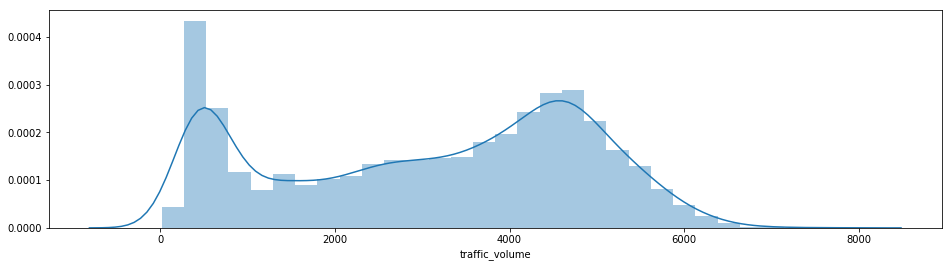

In [132]:
plt.figure(figsize=(16,4))
sns.distplot(submission["traffic_volume"])

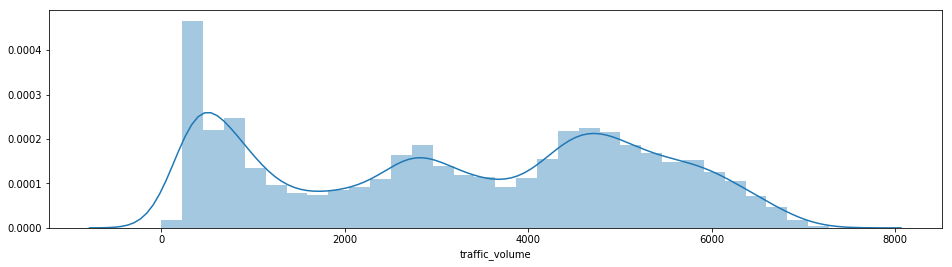

In [134]:
plt.figure(figsize=(16,4))
sns.distplot(train["traffic_volume"])